## Lambda-выражения

Под lambda-выражениями будем понимать обработку каждого элемента списка одной операцией. Данный функциональный подход наиболее оптимизирован в Python для обработки большого массива данных и позволяет грамотно и лаконично задать процесс обработки в одну строку

In [2]:
def more3(l):
    result = []
    for n in l:
        if n > 3:
            result.append(n)
    return result #[x > 3  for x in l]

In [3]:
list1 = [1, 2, 5, 4, 6, 3, 4]

In [4]:
more3(list1)

[5, 4, 6, 4]

In [5]:
def isMoreThan3(n):
    return n > 4

In [6]:
list(filter(isMoreThan3, list1))

[5, 6]

In [7]:
list4 = filter(lambda x: x > 4, list1)
list(list4)

[5, 6]

In [8]:
%timeit more3(list1)

322 ns ± 4.05 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [9]:
%timeit filter(lambda x: x > 3, list1)

122 ns ± 0.105 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [10]:
%timeit filter(isMoreThan3, list1)

81.3 ns ± 0.285 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [16]:
list5 = map(lambda x: x * 2, list1)
list(list5)

[2, 4, 10, 8, 12, 6, 8]

In [17]:
strings = ['a', 'b', 'c']
numbers = [1, 2, 3, 4, 5]
list(zip(strings, numbers))

[('a', 1), ('b', 2), ('c', 3)]

In [20]:
from functools import reduce
list6 = [1, 2, 3, 4, 5]
reduce(lambda x, y: x * y, list6)

120

In [22]:
filter(operations)

[{'id': 1, 'timestamp': 3, 'amount': 2},
 {'id': 2, 'timestamp': 4, 'amount': 8}]

In [23]:
import matplotlib.pyplot as plt

## Датафреймы

Для обработки данных в питоне обычно используют датафреймы. В датафреймах удобно работать с различного рода таблицами, проводить над ними операции, использовать некоторые операции из баз данных.

In [2]:
import pandas as pd

In [3]:
ser = pd.Series([1, 2, 3], index=[3, 2, 1])

In [4]:
ser

3    1
2    2
1    3
dtype: int64

In [5]:
ser.reset_index()

,index,0
0,3,1
1,2,2
2,1,3


`DataFrame` - это удобное представление табличных данных в Python. Каждая колонка данных состоит из специального масси `pd.Series`

In [6]:
df = pd.DataFrame({'a': [1, 3, 4], 'b': [2, 4, 5]})
df


,a,b
0,1,2
1,3,4
2,4,5


Проверим тип с которым создалась переменная df

In [7]:
type(df)

pandas.core.frame.DataFrame

В DataFrame так же можно добавлять значения в колонки, как в примере ниже

In [8]:
df = df.append({'a': 5, 'b': 6}, ignore_index=True)

/tmp/ipykernel_9144/2466297743.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'a': 5, 'b': 6}, ignore_index=True)


In [9]:
df

,a,b
0,1,2
1,3,4
2,4,5
3,5,6


Так же DataFrame поддерживает загрузки из популярных форматов хранения данных CSV (Comma Seporated Value), формат MS Excel, JSON и тд.

> **Запомни!**
> 
> Не стоит загружать большие наборы данных через DataFrame. Почему? Потому что DataFrame загружается сразу весь файл в память, и твоей памяти может просто не хватить. 

In [10]:
df = pd.read_csv('data/TSLA.csv') # можно считывать разные файлы: csv - read_csv, xlsx - read_excel и тд

При простом вызове переменной `df` вы увидете первые 5 значние и последние 5 значений

In [11]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


Или можем сразу вызвать функцию `head()` которая выведет первые 5 строк, ну или указав из количество `head(3)`

In [12]:
# head(x) дает взглянуть на x первых строк

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


Тоже самое что и `head` только с конца

In [13]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300
2415,2020-02-03,673.690002,786.140015,673.520020,780.000000,780.000000,47065000


При помощи функции `info()` можно взглянуть на общую информацию о наборе данных. 

In [14]:
#info() сразу дает информацию о типах данных и количестве NaN значений

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


Доступ к конкретным колонкам, можно получить просто указав из как в словаре. Вам возратиться объект `Series`

In [15]:
df["Volume"]

0       18766300
1       17187100
2        8218800
3        5139800
4        6866900
          ...   
2411    11788500
2412    17801500
2413    29005700
2414    15719300
2415    47065000
Name: Volume, Length: 2416, dtype: int64

In [16]:
# Чтобы посмотреть на колонку, надо указать ее название в ковычках и квадратных скобках

df['Date']

0       2010-06-29
1       2010-06-30
2       2010-07-01
3       2010-07-02
4       2010-07-06
           ...    
2411    2020-01-28
2412    2020-01-29
2413    2020-01-30
2414    2020-01-31
2415    2020-02-03
Name: Date, Length: 2416, dtype: object

In [17]:
# либо через точку

df.Date

0       2010-06-29
1       2010-06-30
2       2010-07-01
3       2010-07-02
4       2010-07-06
           ...    
2411    2020-01-28
2412    2020-01-29
2413    2020-01-30
2414    2020-01-31
2415    2020-02-03
Name: Date, Length: 2416, dtype: object

Так же если вы хотите получить несколко колонок сразу, то необходимо указать их в двойных квадратных скобках `[[ ]]`. 

Пример ниже

In [18]:
df[['Date', 'Volume', "Close"]]

,Date,Volume,Close
0,2010-06-29,18766300,23.889999
1,2010-06-30,17187100,23.830000
2,2010-07-01,8218800,21.959999
3,2010-07-02,5139800,19.200001
4,2010-07-06,6866900,16.110001
...,...,...,...
2411,2020-01-28,11788500,566.900024
2412,2020-01-29,17801500,580.989990
2413,2020-01-30,29005700,640.809998
2414,2020-01-31,15719300,650.570007


Получить можно не только колонку но и всю строку по последовательности, через экземпляр свойства (property) `loc`

In [21]:
# Строка с указанным номером

df.loc[1]

Date         2010-06-30
Open          25.790001
High              30.42
Low           23.299999
Close             23.83
Adj Close         23.83
Volume         17187100
Name: 1, dtype: object

In [22]:
index = [100,101,1231, 2199]

Или же можем получить несколько строк сразу передав массив

In [49]:
# Либо строки

df.loc[index]

,Date,Open,High,Low,Close,Adj Close,Volume
100,2010-11-18,30.670000,30.740000,28.920000,29.889999,29.889999,956100
101,2010-11-19,30.160000,31.370001,29.700001,30.990000,30.990000,1150500
1231,2015-05-20,247.130005,247.740005,241.369995,244.350006,244.350006,3755600
2199,2019-03-26,264.440002,270.260010,264.429993,267.769989,267.769989,7350900


Получить можно не только колонку но и всю строку по индексу, через экземпляр свойства (property) `iloc`

In [ ]:
# iloc - строка с указанным индексом

df.iloc[5]

Date         2010-07-07
Open              3.280
High              3.326
Low               2.996
Close             3.160
Adj Close         3.160
Volume         34608500
Name: 5, dtype: object

In [ ]:
df.iloc[[5, 7]]

,Date,Open,High,Low,Close,Adj Close,Volume
5,2010-07-07,3.280,3.326,2.996,3.16,3.16,34608500
7,2010-07-09,3.516,3.580,3.310,3.48,3.48,20253000


In [53]:
df.iloc[20:41]

,Date,Open,High,Low,Close,Adj Close,Volume
20,2010-07-28,20.549999,20.900000,20.510000,20.719999,20.719999,467200
21,2010-07-29,20.770000,20.879999,20.000000,20.350000,20.350000,616000
22,2010-07-30,20.200001,20.440001,19.549999,19.940001,19.940001,426900
23,2010-08-02,20.500000,20.969999,20.330000,20.920000,20.920000,718100
24,2010-08-03,21.000000,21.950001,20.820000,21.950001,21.950001,1230500
25,2010-08-04,21.950001,22.180000,20.850000,21.260000,21.260000,913000
26,2010-08-05,21.540001,21.549999,20.049999,20.450001,20.450001,796200
27,2010-08-06,20.100000,20.160000,19.520000,19.590000,19.590000,741900
28,2010-08-09,19.900000,19.980000,19.450001,19.600000,19.600000,812700
29,2010-08-10,19.650000,19.650000,18.820000,19.030001,19.030001,1281300


In [ ]:
df[50:100]

,Date,Open,High,Low,Close,Adj Close,Volume
50,2010-09-09,4.200,4.210,4.138,4.142,4.142,1881000
51,2010-09-10,4.150,4.186,3.952,4.034,4.034,1933000
52,2010-09-13,4.178,4.180,4.100,4.144,4.144,1804000
53,2010-09-14,4.108,4.320,4.106,4.224,4.224,3273500
54,2010-09-15,4.196,4.400,4.158,4.396,4.396,3423000
55,2010-09-16,4.430,4.632,4.168,4.188,4.188,13422500
56,2010-09-17,4.204,4.264,3.960,4.046,4.046,5992500
57,2010-09-20,4.134,4.270,4.032,4.212,4.212,4737500
58,2010-09-21,4.178,4.310,4.134,4.154,4.154,3980000
59,2010-09-22,4.174,4.190,3.960,3.974,3.974,4814500


Для поиска нужных строк можно использовать lambda-выражения или другие условия

In [55]:
df.iloc[lambda x: x.index % 5 == 0]

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
5,2010-07-07,16.400000,16.629999,14.980000,15.800000,15.800000,6921700
10,2010-07-14,17.940001,20.150000,17.760000,19.840000,19.840000,4195200
15,2010-07-21,20.660000,20.900000,19.500000,20.219999,20.219999,1252500
20,2010-07-28,20.549999,20.900000,20.510000,20.719999,20.719999,467200
...,...,...,...,...,...,...,...
2395,2020-01-03,440.500000,454.000000,436.920013,443.010010,443.010010,17778500
2400,2020-01-10,481.790009,484.940002,473.700012,478.149994,478.149994,12959500
2405,2020-01-17,507.609985,515.669983,503.160004,510.500000,510.500000,13629100
2410,2020-01-27,541.989990,564.440002,539.280029,558.020020,558.020020,13608100


`iloc` так же позволяет вернуть не только строки которые интересны, но и колонки через указания их индексов

In [ ]:
df.iloc[[100, 300], [1, 4]]

Вместо индексирование обычными числами можно производить индексацию при помощи дат (вприниципе иных типов данных datetime,str, object и тд.)

In [23]:
df.index = df.Date

Посмотрим что же получилось

In [24]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2010-06-29,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
2010-06-30,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2010-07-01,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
2010-07-02,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
2010-07-06,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


Возьмем объект по `df.index` при помощи `loc`

In [27]:
df.loc['2010-06-29']

Date         2010-06-29
Open               19.0
High               25.0
Low           17.540001
Close         23.889999
Adj Close     23.889999
Volume         18766300
Name: 2010-06-29, dtype: object

А обратно можем вернуть все применим генератор `range`

In [28]:
df.index = range(len(df))

In [29]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


Объект `Series` имеет встроенные статисчиеские методы 

In [30]:
df['Close'].mean(), df['Close'].max(),df['Close'].min(), df['Close'].median(), 

(186.40365078187088, 780.0, 15.8, 212.960007)

Бывает иногда что занчение в колонке пропущены и иногда их проще удалить чем восстанавливать или апроксимировать 

In [67]:
df = df.dropna()

Построение запроса с  условием

In [71]:
# Поиск строк по условию


df[df['Volume'] > 17187100]['Close']

0        23.889999
720      69.400002
721      76.760002
722      87.800003
723      83.239998
           ...    
2407    569.559998
2408    572.200012
2412    580.989990
2413    640.809998
2415    780.000000
Name: Close, Length: 92, dtype: float64

In [73]:
len(df[df['Open'] > df['Open'].mean()]) # количество дней, когда цена была выше стредней

1475

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2813 entries, 0 to 2812
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2813 non-null   object 
 1   Open       2813 non-null   float64
 2   High       2813 non-null   float64
 3   Low        2813 non-null   float64
 4   Close      2813 non-null   float64
 5   Adj Close  2813 non-null   float64
 6   Volume     2813 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 175.8+ KB


In [75]:
df['Open'].where(lambda x: x < 100).dropna()

0      19.000000
1      25.790001
2      25.000000
3      23.000000
4      20.000000
         ...    
741    98.930000
742    98.180000
743    96.800003
744    99.000000
751    96.500000
Name: Open, Length: 742, dtype: float64

In [76]:
df['Open']

0        19.000000
1        25.790001
2        25.000000
3        23.000000
4        20.000000
           ...    
2411    568.489990
2412    575.690002
2413    632.419983
2414    640.000000
2415    673.690002
Name: Open, Length: 2416, dtype: float64

Для модицикации всей колонки, допустим увеличение ее в 10 раз, можно изпользовать метод `apply`, который итерируемом достает элемент и передает его в `lambda` выражение

In [77]:
 df['Open'].apply(lambda x: x * 10)

0        190.00000
1        257.90001
2        250.00000
3        230.00000
4        200.00000
           ...    
2411    5684.89990
2412    5756.90002
2413    6324.19983
2414    6400.00000
2415    6736.90002
Name: Open, Length: 2416, dtype: float64

In [90]:
import numpy as np

In [93]:
def average(item):
    if item > np.average(df['Close']):
        return item

Ну или передовать элемент непосредственно в функцию. А вней написать большое количество взаимодейсвтия и элементов

In [95]:
df['Open'].apply(lambda x: average(x)).dropna()

817     186.699997
818     187.520004
819     189.000000
820     193.960007
821     188.589996
           ...    
2411    568.489990
2412    575.690002
2413    632.419983
2414    640.000000
2415    673.690002
Name: Open, Length: 1475, dtype: float64

In [ ]:
mean = df['Open'].mean()
def is_too_low(x):
  if x < mean*0.8:
    return True
  else:
    return False

def replace_too_low(x):
  if x < mean*0.9:
    return  mean*0.9
  else:
    return x

def my_replace(x):
  return x*0.95

df[df['Open'].apply(is_too_low)]['Open'] = mean*0.8

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
df['Open'].apply(replace_too_low)

0       167.644032
1       167.644032
2       167.644032
3       167.644032
4       167.644032
           ...    
2411    568.489990
2412    575.690002
2413    632.419983
2414    640.000000
2415    673.690002
Name: Open, Length: 2416, dtype: float64

In [ ]:
df['Open'] = df[df['Open'] < mean*0.95]['Open'].apply(my_replace)

In [ ]:
np.mean([5, 4.6])

4.8

In [100]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [102]:
df = df.drop('Adj Close', 1)


/tmp/ipykernel_60853/1067998117.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('Adj Close', 1)


In [103]:
df

,Date,Open,High,Low,Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,6866900
...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,15719300


<AxesSubplot:>

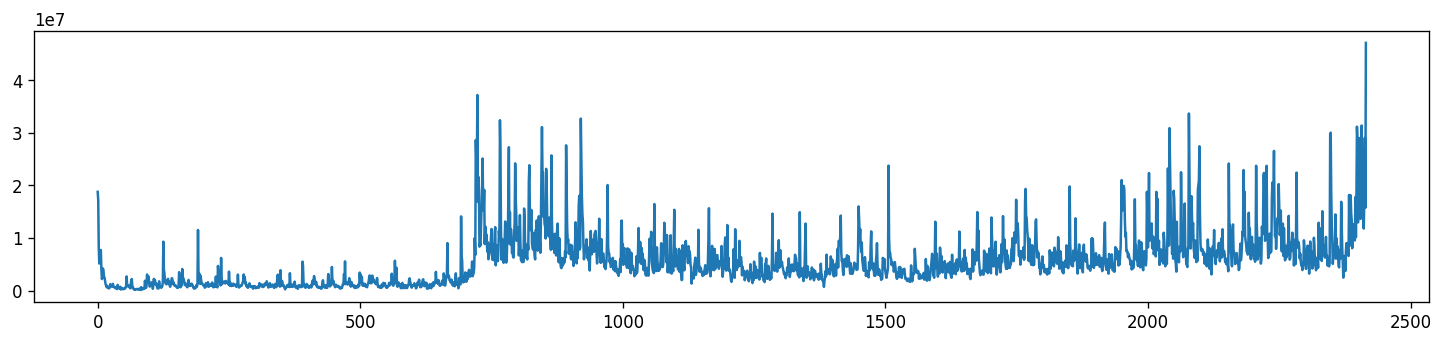

In [113]:
from matplotlib.pyplot import figure

figure(figsize=(15, 3), dpi=120)

df['Volume'].plot()

In [ ]:
import numpy as np
ind = [np.random.randint(0, len(df)) for i in range(50)]

In [ ]:
df['Close'][ind] = None

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2366 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [ ]:
df[df.Close.isna()]

,Date,Open,High,Low,Close,Adj Close,Volume
79,2010-10-20,20.160000,20.690001,20.040001,NaN,20.650000,312500
176,2011-03-10,24.440001,24.490000,23.730000,NaN,24.010000,1017000
241,2011-06-13,28.070000,28.879999,27.879999,NaN,28.430000,1713400
245,2011-06-17,26.870001,27.700001,26.139999,NaN,26.500000,1714000
348,2011-11-11,31.900000,34.500000,30.570000,NaN,33.639999,3868300
390,2012-01-13,28.400000,28.500000,22.639999,NaN,22.790001,5500400
428,2012-03-09,33.200001,35.310001,33.200001,NaN,34.740002,1553400
530,2012-08-03,26.900000,27.549999,26.740000,NaN,27.270000,1209500
541,2012-08-20,30.150000,30.389999,29.100000,NaN,29.510000,1179100
616,2012-12-07,34.299999,34.490002,33.849998,NaN,34.169998,664400


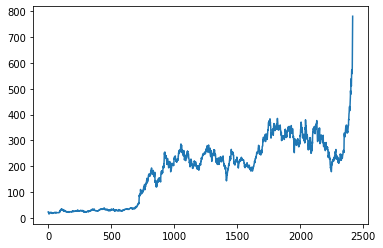

In [ ]:
plt.plot(df[df.Close.isna() == False]['Close'].index, df[df.Close.isna() == False]['Close'])

In [ ]:
# Заполним пропуски средним значением между вчера и завтра

# а как


,Date,Open,High,Low,Close,Adj Close,Volume
78,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2125,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2272,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2311,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['Close'].fillna(df['Close'].mean())

0        23.889999
1        23.830000
2        21.959999
3        19.200001
4        16.110001
           ...    
2411    566.900024
2412    580.989990
2413    640.809998
2414    650.570007
2415    780.000000
Name: Close, Length: 2416, dtype: float64